In [ ]:
'''
This script loads multichannel data from CSV files corresponding to three
experimental conditions (e.g., control, deprivation, recovery). It averages
the trials for a specific channel within each condition, then performs a
Short-Time Fourier Transform (STFT) to generate spectrograms with a globally
normalized power scale for accurate comparison.
'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import stft

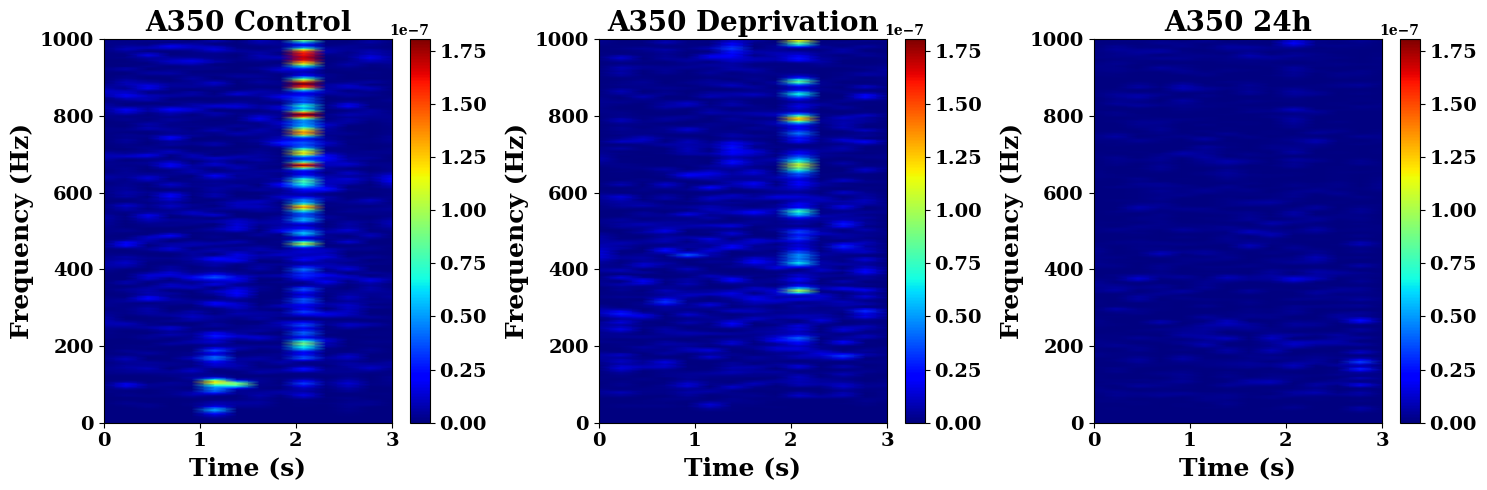

In [5]:
# Function to perform STFT analysis on a single channel and plot the result
def analyze_stft_single_channel(channel_data, ax, condition_name, fs=2000, vmin=None, vmax=None):
    # Perform the STFT for the specified channel
    f, t, Zxx = stft(channel_data, fs=fs, nperseg=512, noverlap=50, window='flattop')

    # Plot the spectrogram for the channel with specified color limits (vmin and vmax)
    cax = ax.pcolormesh(t, f, np.abs(Zxx)**2, shading='gouraud', cmap='jet', vmin=vmin, vmax=vmax)
    ax.set_ylim(0, 1000)  # Restrict the y-axis to 0-1000 Hz
    ax.set_xlabel('Time (s)', fontsize=18, fontweight='bold', fontname="Serif")
    ax.set_ylabel('Frequency (Hz)', fontsize=18, fontweight='bold', fontname="Serif")
    ax.set_title(f'{condition_name}', fontsize=20, fontweight='bold', fontname="Serif")

    # Configure the font size for x and y axis tick labels
    ax.tick_params(axis='both', labelsize=14)
    # Apply Serif font and bold style to the tick labels
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname("Serif")
        label.set_fontweight("bold")

    # Configure the colorbar
    cbar = plt.colorbar(cax, ax=ax)
    cbar.ax.tick_params(labelsize=14)
    # Apply Serif font and bold style to the colorbar tick labels
    for label in cbar.ax.get_yticklabels():
        label.set_fontname("Serif")
        label.set_fontweight("bold")
    # Change the format of the colorbar's exponent to Serif and bold
    cbar.ax.yaxis.get_offset_text().set_fontname("Serif")
    cbar.ax.yaxis.get_offset_text().set_fontweight("bold")

# List of CSV files and names of the conditions
csv_files = [
    ('A350_control_3s.csv', 'A350_privacion_3s.csv', 'A350_24h_3s.csv')
]

# Average the repetitions of each file for channel 2
channel2_averages = []
condition_names = ['A350 Control', 'A350 Deprivation', 'A350 24h']

for csv_file_tuple in csv_files: # Iterate through the list containing the tuple
    for csv_file in csv_file_tuple: # Iterate through the filenames in the tuple
        data = pd.read_csv(csv_file, header=None)
        # Select a channel and average its repetitions
        # ch2_avg = data.iloc[:, [0, 2, 4, 6, 8]].mean(axis=1).values  # For Channel 1
        ch2_avg = data.iloc[:, [1, 3, 5, 7, 9]].mean(axis=1).values  # For Channel 2

        # # Example for a noisy file (A455-24h) where only some repetitions are used
        # if condition_name == 'A455 24h':
        #     ch2_avg = data.iloc[:, [7, 9]].mean(axis=1).values

        channel2_averages.append(ch2_avg)

# Find the maximum power to normalize the color scales across all plots
max_power = 0
for ch2_avg in channel2_averages:
    _, _, Zxx = stft(ch2_avg, fs=2000, nperseg=512, noverlap=50, window='flattop')
    max_power = max(max_power, np.max(np.abs(Zxx)**2))

# Create the figure and axes for the 1x3 grid
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot each condition in the grid using the same color scale
for i, (ch2_avg, condition_name) in enumerate(zip(channel2_averages, condition_names)):
    analyze_stft_single_channel(ch2_avg, axs[i], condition_name, fs=2000, vmin=0, vmax=max_power)

# Adjust the figure layout
plt.tight_layout()
# Save the figure
# plt.savefig('Spectrogram_A350_Avg_C2.jpg', format='jpg', dpi=600, bbox_inches='tight')
plt.show()